In [1]:
#Questions:01). Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X. [1]#
import numpy as np
def Mat_Gen(R,C):  
    X = np.random.rand(R,C)     # Generating Matrix of R rows and C columns 
    return X
R = 8     # No. of Samples
C = 6     # No. of varibles
W0 = np.ones((R, 1))  # bias vector of all ones
W = np.random.rand(C,1)  # random coefficients of column vector of matrix X
mu, sigma = 0, 0.1 # mean and standard deviation
noise = np.random.normal(mu, sigma, (R,1)) # normal random variable guassian noise
Mat_Gen(R,C)   #Calling function to generate Data Matrix of R amples and C features  


array([[0.63037957, 0.14171821, 0.84205958, 0.26685357, 0.54055983,
        0.7437417 ],
       [0.91785146, 0.85877931, 0.38436193, 0.64999083, 0.47731549,
        0.36927425],
       [0.80837384, 0.96646559, 0.8924886 , 0.44164948, 0.14015457,
        0.48909657],
       [0.1334786 , 0.26086485, 0.88533622, 0.05391889, 0.80083421,
        0.12311213],
       [0.05558994, 0.89796374, 0.3930103 , 0.82375802, 0.17609822,
        0.54721582],
       [0.51045127, 0.58852672, 0.69878192, 0.71501575, 0.93250838,
        0.40805212],
       [0.88846094, 0.43605513, 0.60087765, 0.16033213, 0.72088192,
        0.29929316],
       [0.31845386, 0.85293599, 0.20253101, 0.8418455 , 0.27603839,
        0.46756929]])

In [2]:
# Comment01:- Here In this Question:01 I have generated data matrix of R no. of samples and C no. of columns.

In [3]:
#Questions:02:-Write a function to generated dependent variable column t.  [1]
# X is data matrix 
# W is weight vector
# W0 is the bias
# noise is the guassin random variable noise
def Indep_Variable(X,W,W0,noise):  
    t = np.dot(X, W) + W0 + noise  # target vector is defined
    return  t     # returning the target vector t
X = Mat_Gen(R,C)    # Data MAtrix is generated using the function Mat_Gen Defined in the question no. 01
Indep_Variable(X,W,W0,noise)    # Called the function to generate the t vector 


array([[1.91446461],
       [2.31833518],
       [1.6760618 ],
       [2.51591264],
       [1.93054901],
       [2.65706006],
       [2.04462182],
       [2.21006288]])

In [4]:
#Comment02:-  Here in the above question:02 the the independent Variable t is generated taking X data matrix , W weight vector, W0 is bias and noise is the normal guassian random variable noise.

In [5]:
#Questions:03:- Write a function to compute a linear regression estimate. [1]
# X is data matrix 
# W is weight vector
# y is the predicted variable
def Lin_Regression(X,W):
    
    y = np.dot(X, W)    # estimating the linear regression , multiplying X data matrix with the W weight vector
    return y   # returning the linear regression estimate
Lin_Regression(X,W)    # Calling the function to compute linear regression estimate
    
    

array([[0.87158513],
       [1.28088332],
       [0.67364665],
       [1.4616065 ],
       [0.85641555],
       [1.75981558],
       [1.14743663],
       [1.25922807]])

In [6]:
# Comment:03:- Here the given problem above have calculated the linear regression estimate

In [7]:
#Questions:04:-Write a function to compute the mean square error of two vectors y and t. [1]
# X is data matrix 
# W is weight vector
# y is predicted varible
# t is target variable

def Mean_Square(y,t): # defining a function to compute Mean square error
    MSE = np.square(np.subtract(y,t)).mean()   # Calculating mean square error  
    return MSE                 # returning Mean square error
t = Indep_Variable(X,W,W0,noise)   # Generating t target variable
y = Lin_Regression(X,W)   # estimating y predicted variable
Mean_Square(y,t)   # Calling function to comnpute the Mean square error

0.993517494129238

In [8]:
# Comment:04:- In the question:04 mean square error between and y and t is calculated

In [9]:
# question 5
from numpy.linalg import inv

def Wei_Of_Lin_Rig(X, t, Lambda, Identity_Dim):    #Defining function to estimate weights using pseodo inverse method
    X_t = X.transpose()          # Transpose of Data matrix X 
    I = np.identity(Identity_Dim)  # Identity matrix of dimention C*C
    res1 = np.dot(X_t, X)          # (X^T)*X 
    res2 = I*Lambda                # Multiplying Lambda with the Identity matrix
    res3 = np.dot(X_t, t)          # Multiplying transpose of X with the target vector t
    res4 = np.add(res2 , res1)     #Adding res1 and res2
    res5 = inv(res4)               # Calculating inverse 
    w = np.dot(res5, res3)         
    y = np.dot(X, w)            
    M = Mean_Square(y,t)           # Computing mean square error 
    return w, y, M                 # returning the weight vector , predicted vector , and Mean square error 

Wei_Of_Lin_Rig(X,t, R,C)          # Calling function to find weight vector using pseudo inverse method

    
    
    
    
    

(array([[0.41205732],
        [0.28495954],
        [0.40815231],
        [0.55239694],
        [0.35883943],
        [0.48539342]]),
 array([[0.94016911],
        [1.33105167],
        [1.06350626],
        [1.38838153],
        [0.97916438],
        [1.6023543 ],
        [1.57167122],
        [1.68490079]]),
 0.7609432000526857)

In [10]:
# Quetion No. 06


def Grad_MSE(X, t, W,C):
   
    bias = 0.5  # defining bias
    s= 0 
    G = np.zeros((C,1))    # Create an array of all zeros
    for j in range(C):
        for i in range(R):
            row_r1 = X[i, :] #Extraction of the features of Data matrix
            p = np.dot(row_r1, W)    # features multiplied by weight vector
            q = np.subtract(np.add(p, bias),t[i]) # error of i th element of the array
            r=np.multiply(q,X[i,j])  # multiplying error with the x[i,j] element of the data matrix
            s = np.add(s,r) # adding all errors after multiplying with x[i,j] element till No. of samples
        G[j]= s  # Storing Gradient in array called G
        s=0
    factor = (-5) # taking mean square error
    G1 = np.divide(G, factor)
    return G1    # returning the gradient vector of MSE w.r.t. weight,s of the feature
Grad_MSE(X,t,W,C)   # Calling funtion to calculate Gradient of MSE

array([[0.43342809],
       [0.25507244],
       [0.34399331],
       [0.53024813],
       [0.34453497],
       [0.44133961]])

In [11]:
# Question No. 07:- Function to write L2 norm of a vector w. 
def L2_Norm(w):
    
    L2 = np.sum(np.power((w),2))  # computing the L2 norm
    return w,L2     # Returning wieght vector and L2 norm 


L2_Norm(W)  # returns the L2 norm of the weight vector w
  

(array([[0.12071244],
        [0.71030888],
        [0.84220161],
        [0.04720608],
        [0.40103659],
        [0.49501935]]),
 1.6365166758535672)

In [12]:
# Question No. 08:-Function to write the Gradient of L2 norm w.r.t. w
def Gradient_L2(w):     # define the function to calculate the L2 norm
   
    G = np.multiply(w, 2)  # computing the gradient of L2 norm
    return G      # Returning the gradient of L2 norm  

Gradient_L2(W)  # returns the gradient of L2 norm of the weight vector w

array([[0.24142488],
       [1.42061776],
       [1.68440322],
       [0.09441215],
       [0.80207319],
       [0.9900387 ]])

In [13]:
# Question No. 09:-Function to write L1 norm of a vector w.
from scipy.linalg import norm
def L1_Norm(w):   # Defining  the function to calculate the L1 norm of w vector
   
    L1 = norm(w, 1)  # computing the L1 norm
    return w,L1 # returning the weight vector and L2 norm
L1_Norm(W)  # returns the L1 norm of the weight vector w
  


(array([[0.12071244],
        [0.71030888],
        [0.84220161],
        [0.04720608],
        [0.40103659],
        [0.49501935]]),
 2.6164849559206065)

In [14]:
# Question No. 10:- Function to write the Gradient of L1 norm w.r.t w 
def Gradient_L1(w,C):     # Defining Function to Calculate the Gradient of L1 norm 
    Grad_L1 = np.zeros((C, 1));   # Initializing the Vector Grad_L1 with zero entries 
    for k in range(C):
        if w[k] < 0 :
            Grad_L1[k]= -1
        else:
            Grad_L1[k] = 1
    return Grad_L1
     
Gradient_L1(W,C)  # Calling function to calculate the Gradient of L1 norm
#Comment:- The logic applied to find the Gradient of L1 norm is that if entry of weight vector element is negative then the corresponding Gradient vector entry is -1 one , otherwise entry for the gradient vector is +1; 
                
    
        
     
    


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [15]:
# Question no. 11:-Write a function for a single update of weights of linear regression using gradient descent.
def gradient_Descent(X, t, W_old, Lambda1, Lambda2, eta,C ):   # Defining function to calculate to return weight vector using graient descent
   
 
    P_1 = Grad_MSE(X,t,W_old,C)   # Gradient Of MSE has been generated
    P_2 = Gradient_L2(W_old)  # returns the gradient of L2 norm of the weight vector W_old
    P_3 = Gradient_L1(W_old,C)  # returns the gradient of L1 norm of the weight vector W_old
    L= P_1 + (P_2*Lambda1) + (P_3*Lambda2)   # Gradient of the loss function
    W_new = W_old - (eta*L) # returns the new updated weight vector
    y = Lin_Regression(X,W_new)   # y is predicted 
    New_MSE = Mean_Square(y,t)    # Mean square error is comuted
    return W_new, New_MSE       # returning the Weight vector , and Updated MSE
    

W_old = np.ones((C,1))  # weight of all ones is generated 


gradient_Descent(X, t, W_old , 0.0000011, 0.0011, 0.0011,C)    # Calling function to calculate the weight vector using gradient dscent 
    

(array([[1.00145152],
        [1.00100339],
        [1.00083915],
        [1.00179715],
        [1.00124035],
        [1.00154616]]),
 1.0356435249758909)

In [16]:
# Question no. 12:-Write a function for a single update of weights of linear regression using gradient descent.
import math
def gradient_Descent_with_iteration(X, t, W_old, Lambda1, Lambda2, eta, m, n,C):   # Defining the function to Compute the weight vector using Gradient descent with iteration
    # m in min no. of iteration 
    # n min. change in NMRSE
    Newest_W = W_old
    Newest_MSE = 5 
    Old_NRMSE = 5
    Va = np.var(t)  # Variance of vactor t
    Std_Dev = math.sqrt(Va)  # Standard Deviation of the t
    for i in range(m):
        Newest_W , Newest_MSE = gradient_Descent(X, t, Newest_W , Lambda1, Lambda2 , eta,C) # storing Weight vecor and MSE in a tupke named result
        RMSE = math.sqrt(Newest_MSE)  # Calculates Root Mean Square MSE
        N_RMSE = np.divide(RMSE,Std_Dev) # Calculates the Normalized mean square error
        Diff = N_RMSE - Old_NRMSE  # Change in NRMSE
        Old_NRMSE = N_RMSE   # Assign New NRMSE to Old NRMSE
        Abs_Diff = np.absolute(Diff)  # Absolute Difference
        print(Abs_Diff)
        if Abs_Diff < n:   # Checking the condition if the Change in NRMSE is less than specified value n
            break
    #print("End of for loop")
   
    return Newest_W, N_RMSE  # Returning the weight vector and normalized root mean square value



gradient_Descent_with_iteration(X, t, W_old , 0.1, 0.1, 0.0011, 100, 0.0001,C)   # Calling function 
    

1.7051491618157502
0.010174231486580254
0.010205176827608131
0.010236197356892074
0.010267293318090509
0.010298464955440512
0.010329712513753364
0.010361036238421661
0.0103924363754202
0.010423913171297539
0.010455466873194208
0.010487097728826722
0.010518805986499569
0.010550591895103434
0.010582455704115645
0.010614397663597064
0.010646418024206739
0.010678517037184143
0.010710694954372268
0.01074295202819231
0.010775288511675196
0.010807704658436723
0.010840200722695315
0.010872776959264474
0.010905433623558114
0.010938170971593664
0.010970989259984965
0.011003888745956925
0.011036869687333528
0.011069932342549826
0.011103076970644832
0.011136303831269512
0.011169613184685012
0.011203005291765766
0.01123648041399905
0.011270038813487204
0.01130368075294852
0.011337406495724345
0.011371216305769316
0.011405110447665123
0.011439089186613849
0.011473152788442409
0.011507301519605662
0.011541535647181966
0.011575855438886506
0.011610261163057523
0.011644753088674076
0.011679331485341837

(array([[1.12824923],
        [1.07864262],
        [1.06218131],
        [1.16722682],
        [1.10506894],
        [1.13934289]]),
 4.464968702008321)

[1.66244849 0.79067252 0.69390537 1.42643969]
[1.86847176 0.70528734 1.36069264 0.71210741]
[1.74807165 0.79336483 1.2097576  1.07066249]
[2.16510916 1.19770421 0.69591178 0.93273659]
[2.74316285 1.152458   0.88191182 0.78528562]


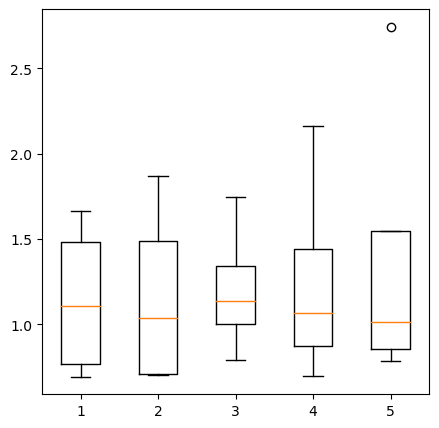

[2.59975495 0.7957831  0.61596936 0.63144655]
[2.16710913 0.70322721 0.61489429 0.61793165]
[4.73449649 0.67789009 0.6313458  0.62370803]
[2.22887806 0.72936214 0.62135678 0.62161848]
[2.62981114 0.75350678 0.6197491  0.62604581]


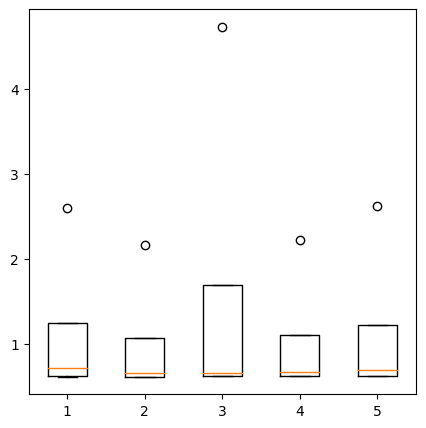

In [21]:
#Question:13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

# Part:-a) Training and validation NRMSE obtained using pseudo inverse with number of training samples [2]
import matplotlib.pyplot as plt
import random



# Here we are training the data
C = 4
lambada = 5
MSE_array = np.array([0])   # Initializing an array to store the NRMSE Values 
MSE_new = {}     # Initializing an array to store an array of NRMSE's for each seed
for j in range(6):
    rng = np.random.default_rng(seed=j*10)     # defining seed
    for i in range(1,5):
        X = Mat_Gen(10**i,C)      # Data matrix generation with No. of samples varying
        W0 = np.ones((10**i, 1))  # bias vector of all ones
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10**i,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)    # target  variable
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
    MSE_array = np.delete(MSE_array,0)    
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
for k in range(5):
    print(MSE_new[k])

fig = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new[0],MSE_new[1],MSE_new[2],MSE_new[3],MSE_new[4]])
plt.show()

#Here Now we will test the data on smaller no. of samples
D = 4
lambada1 = 5
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X1 = Mat_Gen(8**i,D)
        W0 = np.ones((8**i, 1))  # bias vector of all ones
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise1 = np.random.normal(mu, sigma, (8**i,1)) # normal random variable guassian noise
        t_test = Indep_Variable(X1,W_true,W0, noise1)
        W_test, Y_test, MSE_test = Wei_Of_Lin_Rig(X1,t_test, lambada1,4)
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for l in range(5):
    print(MSE_new1[l])
    
fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()




#Comment:- For the varying no. of samples if we increases the no. of the samples the NRMSE Decreases 
        


[2.18357405 0.80291347 0.44795058 0.42793873]
[1.64512028 0.92186078 0.42094395 0.3455648 ]
[2.79082911 1.48752702 0.52175136 0.20815371]
[1.74526501 1.15915666 0.3794857  0.20712646]
[3.18270604 0.77784069 0.53121326 0.19689246]


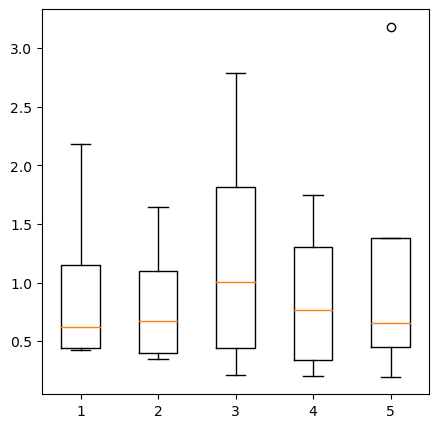

In [23]:
#Question:13. 
# Part:-b) Training and validation NRMSE obtained using pseudo inverse with number of variables [2]
import matplotlib.pyplot as plt
import random
R = 10
lambada = 5
MSE_array = np.array([0])
MSE_new = {}
R = 10
lambada1 = 5
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4**i)
        W0 = np.ones((10, 1))  # bias vector of all ones
        W = np.random.rand(4**i,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada,4**i)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
        #*************** Here for validation set the NRMSE is generated*************# 
        X1 = Mat_Gen(R,4**i)
        W0 = np.ones((R, 1))  # bias vector of all ones
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise1 = np.random.normal(mu, sigma, (R,1)) # normal random variable guassian noise
        t_test = Indep_Variable(X1,W_true,W0, noise1)
        W_test, Y_test, MSE_test = Wei_Of_Lin_Rig(X1,t_test, lambada1,4**i )
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array = np.delete(MSE_array,0)   
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(5):
    print(MSE_new1[k])

fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()



#Comment:-  With Increase in no. of variables the The NRMSE decreses for Each seed 



[2.84053877 1.06762214 1.88548507 1.14394292]
[1.55350431 2.62417236 1.34394919 0.96207807]
[1.47325405 2.16784264 1.51490852 2.18895284]
[1.6230049  1.42211071 1.32731875 1.16567055]
[1.43994528 1.97337897 1.74175773 2.54341965]


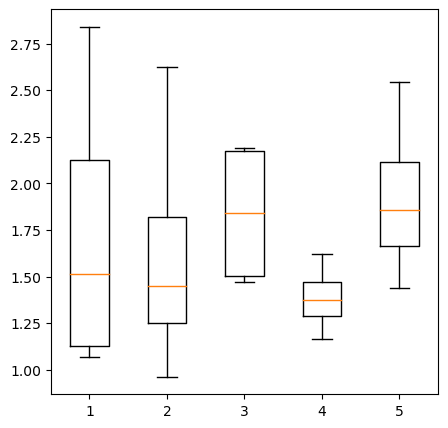

In [26]:
#Question:13.
# Part:-c) Training and validation NRMSE obtained using pseudo inverse with noise variance [2]
import matplotlib.pyplot as plt
import random
R = 10
lambada = 5
MSE_array = np.array([0])
MSE_new = {}
lambada1 = 5
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        W0 = np.ones((10, 1))  # bias vector of all ones
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1*i # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        #print(W_true)
        #print(W_true)
        #print(Y_New)
        #print(MSE)
        MSE_array =np.append(MSE_array, NRMSE)
        # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
       # print(X1)
        W0 = np.ones((10, 1))  # bias vector of all ones
        # W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma1 = 0, 0.2*i # mean and standard deviation
        noise1 = np.random.normal(mu, sigma1, (10,1)) # normal random variable guassian noise
        t_test = Indep_Variable(X1,W_true,W0, noise1)
        #print(t_test)
        W_test, Y_test, MSE_test = Wei_Of_Lin_Rig(X1,t_test, lambada1,4 )
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        #print(W_true)
        #print(Y_New)
        #print(MSE)
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array = np.delete(MSE_array,0)       
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(5):
    print(MSE_new1[k])


fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()


#Comment:-  Here in the program Boxplot for the Validation set is shown and NRMSE is decreasing with increasing in the noise variance in standard normal guassian random variable




[2.0988077  3.28259731 3.28399561 2.90106474]
[1.94854957 2.28730172 2.34307024 2.7818566 ]
[1.63127479 3.10139224 2.41148097 2.67253111]
[1.84551924 2.74756091 3.47944448 2.76244693]
[4.10515216 2.18372977 2.12207948 3.65270162]
[2.23411013 2.42829901 2.49404847 2.3052894 ]


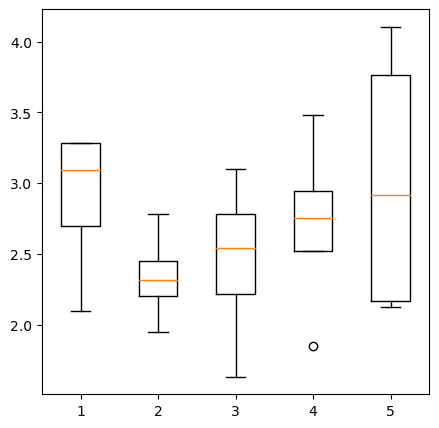

In [31]:
#Question:13.
# Part:-d) Training and validation NRMSE obtained using pseudo inverse with w0 [2]
import matplotlib.pyplot as plt
import random
R = 10
lambada = 5
MSE_array = np.array([0])
MSE_new = {}
lambada1 = 5
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        W0 = (np.ones((10, 1)))*i  # random bias vector
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
        
        # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
        W1 = (np.ones((10, 1)))*i*2  # random bias vector 
        mu, sigma1 = 0, 0.1 # mean and standard deviation
        noise1 = np.random.normal(mu, sigma1, (10,1)) # normal random variable guassian noise
        t_test = Indep_Variable(X1,W_true,W0, noise1)
        W_test, Y_test, MSE_test = Wei_Of_Lin_Rig(X1,t_test, lambada1,4 )
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array = np.delete(MSE_array,0)      
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(6):
    print(MSE_new1[k])


fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()


#Comment :- With increase in the values of the , bias vector in each iteration, No any trends has been seen in the NRMSE. Arbitrarily changing. 




[4.59791877 6.54182556 8.12048251 8.71424611]
[3.61271272 5.03313873 4.71551316 6.53608188]
[6.49552572 5.35724254 6.73782533 8.66817701]
[ 6.43103346  7.53836742 10.69369703  5.35898966]
[ 6.05188988  4.84276062 11.33365659  7.88353361]
[3.55780864 6.15859433 8.57997322 7.42004297]


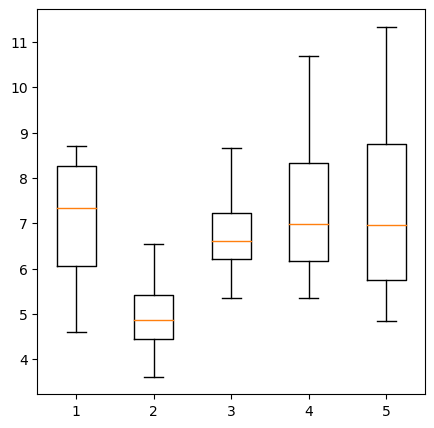

In [32]:
#Question:13.
# Part:-e) Training and validation NRMSE obtained using pseudo inverse with lambda2 [2]
import matplotlib.pyplot as plt
import random
R = 10
lambada = 5
MSE_array = np.array([0])
MSE_new = {}
lambada1 = 5
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        W0 = (np.ones((10, 1)))  # random bias vector
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada*i,4)
        
        MSE_array =np.append(MSE_array, NRMSE)
        
        
        
        # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
        W1 = (np.ones((10, 1)))  # random bias vector 
        mu, sigma1 = 0, 0.1 # mean and standard deviation
        noise1 = np.random.normal(mu, sigma1, (10,1)) # normal random variable guassian noise
        t_test = Indep_Variable(X1,W_true,W0, noise1)
        W_test, Y_test, MSE_test = Wei_Of_Lin_Rig(X1,t_test, lambada1*10*i,4 )
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array = np.delete(MSE_array,0)     
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(6):
    print(MSE_new1[k])

fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()

# Comment:-with incerese in lambda no any trends in the NRMSE has been seen.




In [34]:
#Question:13.
# Part:-f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points [2]
# Import time module
import time
# record start time
start = time.time()
import matplotlib.pyplot as plt
import random
C = 4
lambada = 5
for i in range(1,10000000000):
        X = Mat_Gen(100*i,20**i)  # Generating data matrix
        W0 = np.ones((100*i,1)) # bias vector of all ones
        W = np.random.rand(20**i,1) #random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (100*i,1))###rmal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)  # Target variable
        W_true, Y_New, MSE = Wei_Of_Lin_Rig(X,t, lambada,20**i)   # Calling function to return the weight matrix by pseudo inverse method
        end = time.time()    #record the end time 
        print("The time of execution of above program is :",
        (end-start) * 10**3, "ms")
        
        print("The index i is :", i)
        
        
        
        
        #Comment:- While increasing rows 100 in each iteration and 20 to the power i column in each iteration the following error has occured;
        #MemoryError: Unable to allocate 191. GiB for an array with shape (160000, 160000) and data type float64
        #Time taken :- 126 seconds
        #Breaking point:- 191Gb
        
 


The time of execution of above program is : 1.9938945770263672 ms
The index i is : 1
The time of execution of above program is : 38.8948917388916 ms
The index i is : 2
The time of execution of above program is : 126876.41620635986 ms
The index i is : 3


MemoryError: Unable to allocate 191. GiB for an array with shape (160000, 160000) and data type float64

8.743215342404927
8.661962078436222
7.7451294775597574
8.086043920976305
15.63317374680095
13.413456067423962
4.637062134634457
5.366447721766773
7.047762918188631
3.265622026499173
7.971076175906335
5.0076843730146585
4.235022622047103
2.323434016766612
6.794903066880996
6.861212042480517
6.212773802294887
3.67173919845831
9.612428492843328
9.399965014541245
6.241119031524082
6.263479133684648
9.37360588318212
4.789606751726863
7.0141265780940945
9.052730782254407
13.638434153552268
13.33386455934658
14.886462844905221
7.322345188586324
9.397190405722656
7.992326104058803
7.750658447899125
7.968945942882247
13.882722638047909
11.76675394826319
6.545647619115929
2.2702861438670414
4.890843507422849
5.8671134711897395
13.173503102428224
11.325767873399748
19.047328803050064
17.871140049087263
8.224491549292965
6.19639139222163
7.815967583866172
1.57243650449871
[4.89114459 4.55595238 9.24395054 8.37507993]
[4.71723585 6.48396037 4.34639328 4.20016128]
[5.18873534 6.69754606 8.32626525 5

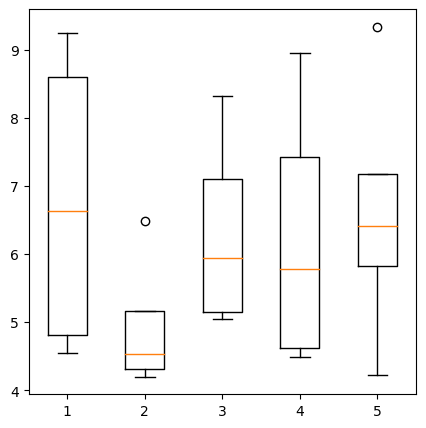

In [35]:
#Question:13.
# Part:-g) Training and validation NRMSE obtained using gradient descent with max_iter [2]
import matplotlib.pyplot as plt
import random
import random as rnd
R = 10
eta = 1
MSE_array = np.array([0])
MSE_new = {}
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        
        W0 = (np.ones((10, 1)))  # random bias vector
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        Lambda1 = rnd.uniform(0,1)   # Lambda is random normal Variable
        Lambda2 = rnd.uniform(0,1)    # Lambda is random normal Variable
        W_true, NRMSE = gradient_Descent_with_iteration(X, t, W, Lambda1, Lambda2, eta, 10*i , 1000,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
       
    # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
        W1 = (np.ones((10, 1)))  # random bias vector 
        t_test = Indep_Variable(X1,W_true,W0, noise)
        Lambda3 = rnd.uniform(0,1) # Lambda is random normal Variable
        Lambda4 = rnd.uniform(0,1)  # Lambda is random normal Variable
        W_test, MSE_test = gradient_Descent_with_iteration(X, t, W, Lambda3, Lambda4, eta, 100*i , 1000,4)

        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
    MSE_array = np.delete(MSE_array,0)      
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_array1= np.delete(MSE_array1,0)
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(5):
    print(MSE_new1[k])
fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()

# No any trends has been seen 




7.232715327939987
10.581437859095395
[[-1.12354006]
 [-0.92724401]
 [-1.33036051]
 [-1.32537454]]
15.581437859095395
7.632930387099568
36.674707097679935
[[-8.34198712]
 [-4.76796233]
 [-6.79655831]
 [-8.42565071]]
41.674707097679935
24.923050601915424
43.75363690100877
[[-6.5277355 ]
 [-6.20599446]
 [-4.50731731]
 [-5.86603116]]
48.75363690100877
48.06518123099064
49.10786837728515
[[-6.14013615]
 [-7.37016571]
 [-7.14574713]
 [-7.97532433]]
54.10786837728515
10.733450610426264
19.643972785753263
[[-2.63195352]
 [-2.49029487]
 [-2.81209091]
 [-2.71738764]]
24.643972785753263
11.5899131336454
35.350313121833565
[[-6.96244962]
 [-6.95515221]
 [-6.06262846]
 [-5.04964788]]
40.350313121833565
34.89092812398131
73.80404922202396
[[ -5.64332614]
 [-10.15618529]
 [ -9.81237951]
 [ -4.73492449]]
78.80404922202396
15.016824335915835
93.55768897010299
[[-12.11850102]
 [-19.49791649]
 [-12.82828323]
 [-14.91873201]]
98.55768897010299
7.670315940103908
14.611144339692249
[[-1.69208551]
 [-1.53768

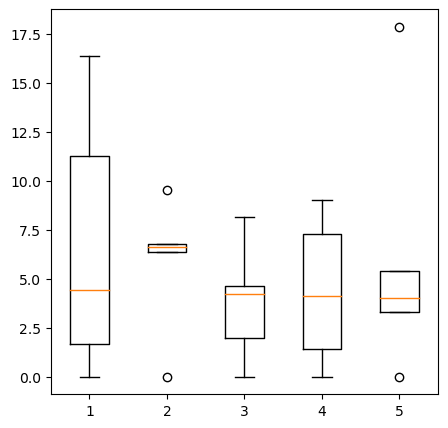

In [36]:
#Test
#Question:13. 
#Part:-h) Training and validation NRMSE obtained using gradient descent with eta [2]
import matplotlib.pyplot as plt
import random
import random as rnd
R = 10
eta = 1
MSE_array = np.array([0])
MSE_new = {}
MSE_array1 = np.array([0])
MSE_new1 = {}
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        
        W0 = (np.ones((10, 1)))  # random bias vector
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        Lambda1 = rnd.uniform(0,1)   # Lambda is random normal Variable
        Lambda2 = rnd.uniform(0,1)    # Lambda is random normal Variable
        W_true, NRMSE = gradient_Descent_with_iteration(X, t, W, Lambda1, Lambda2, eta*i,  1000, 1000,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
       
    # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
        W1 = (np.ones((10, 1)))  # random bias vector 
        # W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        t_test = Indep_Variable(X1,W_true,W0, noise)
        
        Lambda3 = rnd.uniform(0,1) # Lambda is random normal Variable
        Lambda4 = rnd.uniform(0,1)  # Lambda is random normal Variable
        W_test, MSE_test = gradient_Descent_with_iteration(X, t, W, Lambda3, Lambda4, eta*i*2 , 1000, 1000,4)
        
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
        
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(5):
    
    print(MSE_new1[k])

fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()

#Comment:- No any trends has been seen



In [21]:

# Question No.13, i)
import time
# record start time
start = time.time()
import matplotlib.pyplot as plt
import random
# = 2
for i in range(1,10000000000):
#def Time_rec(R1, C1):
    
    C1 = 10000**i
    R1 = 50**i
    X1 = Mat_Gen(R1,C1)    # Data matrix has been generated
    W_0 = np.ones((R1, 1))  # bias vector of all ones
    W_1 = np.random.rand(C1,1)  # random coefficients of column vector of matrix X
    mu1, sigma1 = 0, 0.1 # mean and standard deviation
    noise1 = np.random.normal(mu1, sigma1, (R1,1)) # normal random variable guassian noise
    t1 = Indep_Variable(X1,W_1,W_0,noise1)    # Traget vector has been generated
    W_old1 = np.ones((C1,1))  # weight of all ones is generated 
    W_test, NRMSE =  gradient_Descent_with_iteration(X1, t1, W_old1 , 0.1, 0.1, 0.0011, 100, 100000000, C1)
    print("W_true is :", W_test)
    print("NRMSE is :", NRMSE)
    end = time.time()
    print("The time of execution of above program is :",
    (end-start) * 10**3, "ms")
    print("The index i is :", i)

    # Comment:-MemoryError: Unable to allocate 1.82 TiB for an array with shape (2500, 100000000) and data type float64.
    # this program ran for  2 seconds
    # Breaking point:-1.82TiB


    

0
[[-2530.77094462]
 [-2645.74205573]
 [-2105.88262738]
 ...
 [-2886.88039704]
 [-2025.25955679]
 [-2336.03359555]]
[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [2.]
 [2.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
911.2364667903681
W_true is : [[3.78351804]
 [3.90998626]
 [3.31614089]
 ...
 [4.17523844]
 [3.22745551]
 [3.56930696]]
NRMSE is : 916.2364667903681
The time of execution of above program is : 2145.5278396606445 ms
The index i is : 1


MemoryError: Unable to allocate 1.82 TiB for an array with shape (2500, 100000000) and data type float64

27.410519102737204
16.362009687614762
65.6378063688761
38.612333462509675
127.08225180057525
68.87543742443654
70.9207324817628
37.17328833307137
64.80642325233178
39.490693535995696
43.436718031058234
24.852518744817246
77.11525435403392
42.519806984337436
129.25218506862723
67.550964634097
42.10381084099495
26.04847800932156
94.29174795174883
52.729717851217536
104.25994750505934
56.230395672749296
322.5281045069285
171.39721905559333
27.770481718977457
16.901334342784164
96.52052519847125
53.897301497233386
157.25191706457366
85.25580510902803
141.16656806703506
74.7851844460746
24.650738731742507
15.502343466500374
98.10972946958995
54.930770465526514
133.3522675707418
71.31869446186104
121.45707436753189
66.06843167798387
52.34876376551396
32.404835716564094
35.31900445971866
19.54343968805767
107.00463030066439
59.67680335541566
104.63368892804718
56.02462029571568
[0.         2.75292798 1.64419656 1.18747746 0.65003818]
[0.         2.5947888  0.85974866 1.09497481 0.98269198]
[0

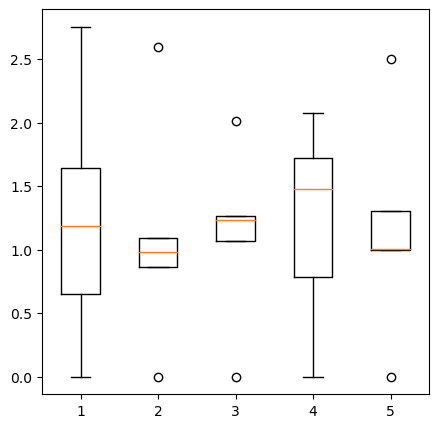

In [38]:
#Test
#Question:13. 
#Part:-k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 [2]
import matplotlib.pyplot as plt
import random
import random as rnd
R = 10
eta = 1
MSE_array = np.array([0])
MSE_new = {}
MSE_array1 = np.array([0])
MSE_new1 = {}
W_Array = {} 
for j in range(6):
    rng = np.random.default_rng(seed=j*10)
    for i in range(1,5):
        X = Mat_Gen(10,4)
        
        W0 = (np.ones((10, 1)))  # random bias vector
        W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        mu, sigma = 0, 0.1 # mean and standard deviation
        noise = np.random.normal(mu, sigma, (10,1)) # normal random variable guassian noise
        t = Indep_Variable(X,W,W0, noise)
        Lambda1 = 1  
        Lambda2 = 2   
        W_true, NRMSE = gradient_Descent_with_iteration(X, t, W, Lambda1, Lambda2*2*i, eta,  1000, 1000,4)
        NRMSE = np.sqrt(MSE/np.var(t))
        MSE_array =np.append(MSE_array, NRMSE)
       
    # Here we will generate Test Targest Vector and NRMSE for Validation set
        X1 = Mat_Gen(10,4)
        W1 = (np.ones((10, 1)))  # random bias vector 
        # W = np.random.rand(4,1)  # random coefficients of column vector of matrix X
        t_test = Indep_Variable(X1,W_true,W0, noise)
        #print(t_test)
        Lambda3 = 1
        Lambda4 = 2
        W_test, MSE_test = gradient_Descent_with_iteration(X, t, W, Lambda3, Lambda4*i, eta , 1000, 1000,4)
       
        NRMSE_test = np.sqrt(MSE_test/np.var(t_test))
        #print(W_true)
        #print(Y_New)
        #print(MSE)
        MSE_array1 =np.append(MSE_array1, NRMSE_test)
        
    MSE_new[j] = MSE_array
    MSE_array = np.array([0])
    MSE_new1[j] = MSE_array1
    MSE_array1 = np.array([0])
for k in range(5):
   
    print(MSE_new1[k])


fig1 = plt.figure(figsize = (5,5))
plt.boxplot([MSE_new1[0],MSE_new1[1],MSE_new1[2],MSE_new1[3],MSE_new1[4]])
plt.show()
# Decreasing with increase in lambda
